In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"../Crime_Dataset_Cleaned.csv")
df

,ID,Reported Date,Occured Date,Occured Time,Area Name,Crime Code,Crime Code Desc,Victim Age,Victim Sex,Race,Crime Loc Code,Crime Loc Code Desc,Weapon Code,Weapon Desc,Status,Status Desc,Location,Latitude,Longitude
2,200110444,2020-04-14,2020-02-13,12:00,Central,845,Sex Offender Registrant Out Of Compliance,0,Unknown,Unknown,726,Police Facility,0,No weapon used,AA,Adult Arrest,200 E 6Th St,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,17:30,N Hollywood,745,Vandalism - Misdeameanor ($399 Or Under),76,Female,Unknown,502,"Multi-Unit Dwelling (Apartment, Duplex, Etc)",0,No weapon used,IC,Invest Cont,5400 Corteen Pl,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,04:15,Mission,740,"Vandalism - Felony ($400 & Over, All Church Va...",31,Unknown,Unknown,409,Beauty Supply Store,0,No weapon used,IC,Invest Cont,14400 Titus St,34.2198,-118.4468
6,200100502,2020-01-02,2020-01-02,13:15,Central,442,Shoplifting - Petty Theft ($950 & Under),23,Male,Hispanic,404,Department Store,0,No weapon used,IC,Invest Cont,700 S Figueroa St,34.0483,-118.2631
7,200100504,2020-01-04,2020-01-04,04:00,Central,946,Other Miscellaneous Crime,0,Unknown,Unknown,726,Police Facility,0,No weapon used,IC,Invest Cont,200 E 6Th St,34.0448,-118.2474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815875,231510379,2023-05-29,2023-05-25,11:00,N Hollywood,662,"Bunco, Grand Theft",25,Male,Unknown,710,Other Premise,0,No weapon used,IC,Invest Cont,5300 Denny Av,34.1667,-118.3643
815876,231110961,2023-07-09,2023-07-06,12:00,Northeast,745,Vandalism - Misdeameanor ($399 Or Under),47,Male,Filipino,704,Elementary School,0,No weapon used,IC,Invest Cont,2000 Merton Av,34.1381,-118.2115
815877,231604807,2023-01-27,2023-01-26,18:00,Foothill,740,"Vandalism - Felony ($400 & Over, All Church Va...",23,Male,Hispanic,122,"Vehicle, Passenger/Truck",0,No weapon used,IC,Invest Cont,12500 Branford St,34.2466,-118.4054
815880,230115220,2023-07-02,2023-07-01,10:00,Central,352,Pickpocket,24,Female,Hispanic,735,Night Club (Open Evenings Only),0,No weapon used,IC,Invest Cont,500 S Main St,34.0467,-118.2485


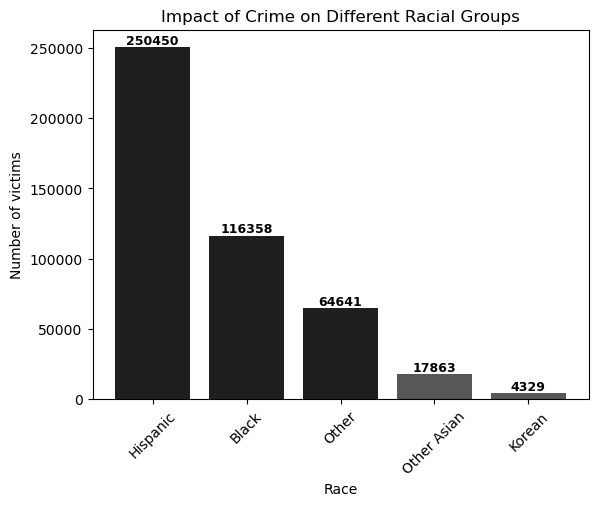

The race most impacted by the number of crimes is Hispanic followed by Black. Unfortunately, a number of 64641 victims are from other race.


In [55]:
#Most affected race by number of crimes from 2020 till 9th October 2023

df_victim_by_race = df.groupby('Race')['ID'].count().reset_index()
df_victim_by_race.columns=['Race','Total_victims']
df_victim_by_race = df_victim_by_race.sort_values(by='Total_victims', ascending=False).iloc[1:6]

df_victim_by_race['color'] = df_victim_by_race['Total_victims'].apply(lambda x:'#575757' if x < 50000 else '#1F1F20')

max_crimes_no = df_victim_by_race['Total_victims'].idxmax()
second_max_crimes_no = df_victim_by_race.sort_values(by='Total_victims',ascending=False).iloc[1].name
third_crimes_no = df_victim_by_race.sort_values(by='Total_victims', ascending = False).iloc[2].name

veals = pd.Series(df_victim_by_race['Total_victims'].values)

plt.bar(df_victim_by_race['Race'], df_victim_by_race['Total_victims'], color=df_victim_by_race['color'])
plt.xlabel('Race')
plt.ylabel('Number of victims')
plt.title('Impact of Crime on Different Racial Groups')
plt.xticks(rotation=45)

for index,value in enumerate(veals):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9, fontweight='semibold', color='#000')

plt.show()
    
message = 'The race most impacted by the number of crimes is \033[1m{}\033[0m followed by \033[1m{}\033[0m' \
          '. Unfortunately, a number of \033[1m{}\033[0m victims are from other race.'.format(
              df_victim_by_race['Race'].loc[max_crimes_no],
              df_victim_by_race['Race'].loc[second_max_crimes_no],
              df_victim_by_race['Total_victims'].loc[third_crimes_no])
print(message)


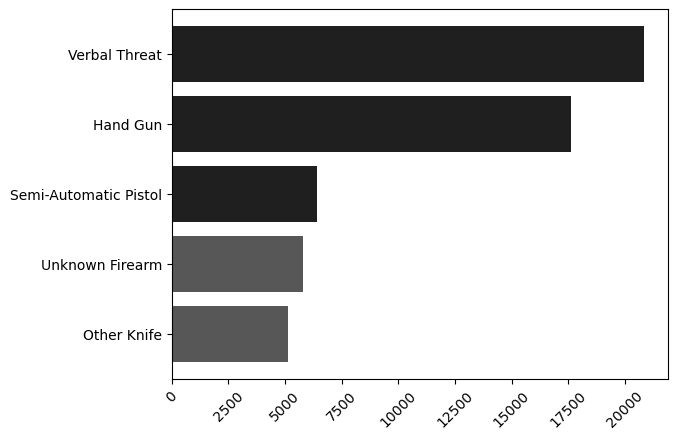

In [84]:
df_most_used_weapons = df.groupby(['Weapon Code','Weapon Desc'])['ID'].count().reset_index()
df_most_used_weapons.columns=['Weapon Code', 'Weapon', 'Number of crimes']
df_most_used_weapons = df_most_used_weapons[~df_most_used_weapons['Weapon Code'].astype(str).str.endswith('0')]
df_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending =False).head(5)
df_top5_most_used_weapons = df_most_used_weapons.sort_values(by='Number of crimes', ascending= True)

df_top5_most_used_weapons['color'] =df_top5_most_used_weapons['Number of crimes'].apply(lambda x:'#575757' if x < 6000 else '#1F1F20')


plt.barh(df_top5_most_used_weapons['Weapon'], df_top5_most_used_weapons['Number of crimes'], color = df_top5_most_used_weapons['color'])
plt.xlabel('')
plt.ylabel('')

#sns.barplot(x='Weapon',y='Number of crimes', data=df_most_used_weapons)
plt.xticks(rotation=45)
plt.show()